<a href="https://colab.research.google.com/github/HARSHIT097/Learnings/blob/main/DL_Imageclassification_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt



# Reading an image using different libraries

Reading an Image

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving ann.jpeg to ann.jpeg


In [ ]:
from IPython.display import Image

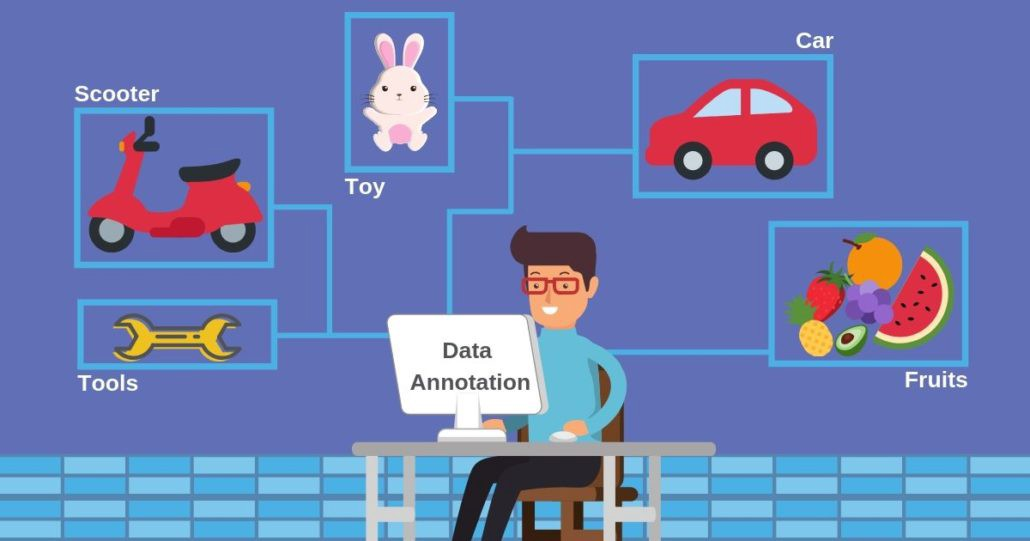

In [ ]:
Image(filename="/content/ann.jpeg", width=244, height=244)

In [ ]:
filename="/content/ann.jpeg"

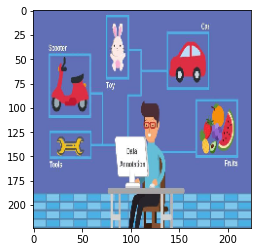

In [ ]:
###using Tensor flow

from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size=(224,224))
plt.imshow(img)

In [ ]:
### 

from PIL import Image
im = Image.open(filename)
im = im.resize((224,224))

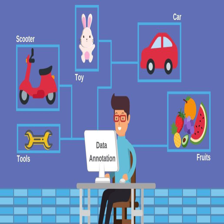

In [ ]:
im

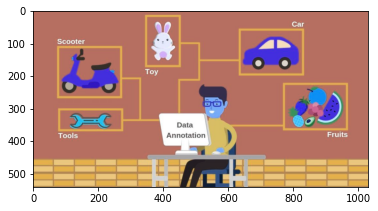

In [ ]:
####using open cv

imgg = cv.imread(filename)
plt.imshow(imgg)

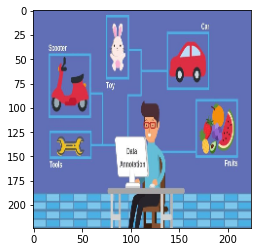

In [ ]:
imgg = cv.resize(imgg, (224,224))
plt.imshow(cv.cvtColor(imgg, cv.COLOR_BGR2RGB))

In [ ]:
model_1 = tf.keras.applications.MobileNet()
model_2 = tf.keras.applications.MobileNetV2()
model_3 = tf.keras.applications.VGG16()

553467904/553467096 [==============================] - 3s 0us/step


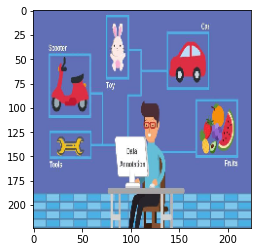

In [ ]:
##preprocessing

from tensorflow.keras.preprocessing import image
img = image.load_img(filename, target_size=(224,224))
plt.imshow(img)

In [ ]:
resized_img = image.img_to_array(img)
print(resized_img.shape)

final_image= (np.expand_dims(resized_img, axis=0)) #need extra dimension
print(resized_img.shape)
final_image = tf.keras.applications.mobilenet.preprocess_input(final_image)

(224, 224, 3)
(224, 224, 3)


In [ ]:
predictions = model_1.predict(final_image)
predictions_1 = model_2.predict(final_image)
predictions_2 = model_3.predict(final_image)

In [ ]:
print(predictions)

[[9.47552148e-10 4.46117519e-06 1.08109898e-05 1.36468984e-07
  1.62548122e-06 7.89161550e-06 2.58254914e-07 2.00707882e-06
  2.95368437e-07 2.48498736e-07 8.31302373e-07 5.72113777e-06
  2.08900403e-07 4.45086954e-08 1.98605039e-06 2.02831146e-07
  9.66171046e-06 7.53885843e-07 1.08631127e-06 2.26349037e-08
  3.73468119e-08 3.38243638e-07 5.11607197e-07 5.98552219e-07
  3.68712881e-06 2.11291535e-05 5.56777252e-07 5.76996399e-06
  1.85587709e-07 9.76210828e-08 8.93725627e-08 3.77459878e-06
  4.84594089e-08 1.84069643e-06 4.85982063e-08 2.02691737e-07
  9.61122879e-08 4.97517931e-07 8.42707209e-07 1.11706919e-08
  2.01674517e-08 5.08487297e-09 8.82152129e-09 3.46083937e-07
  7.67344943e-07 1.50729227e-06 4.70987089e-07 5.66970009e-08
  1.30052742e-08 1.52431380e-06 3.27131920e-06 1.55217931e-05
  8.85997196e-08 1.95521366e-07 4.59543195e-08 4.85503278e-07
  1.12995018e-08 1.40370062e-07 4.53979361e-08 4.30150576e-05
  6.37733990e-08 6.61232136e-09 6.54491927e-08 6.25775272e-07
  9.8297

40960/35363 [==================================] - 0s 0us/step
[[('n03788365', 'mosquito_net', 0.053363908), ('n03291819', 'envelope', 0.05321904), ('n04209239', 'shower_curtain', 0.046804577), ('n03924679', 'photocopier', 0.046549886), ('n15075141', 'toilet_tissue', 0.030542139)]]


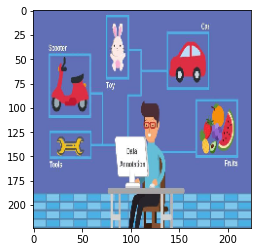

In [ ]:
from tensorflow.keras.applications import imagenet_utils

result = imagenet_utils.decode_predictions(predictions_2)
print(result)
plt.imshow(img)

# 

# Data Augmentation

# Applying Pretrained Model to recognize things

## Create CNN Model and Optimize it using Keras Tuner

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 9.2MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=7e61df05e0e645bd6041d2e866a17e5019cf7d515a381e0085b5d4357b3a1c01
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=c9c2bcfb54dd16cf36740b6e35af0456672b570e9a1f1f1fc4f182c28cd94a24
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 07m 30s]
val_accuracy: 0.859499990940094

Best val_accuracy So Far: 0.9110000133514404
Total elapsed time: 01h 10m 33s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        102464    
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1982528   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 2,086,282
Trainable params: 2,086,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1380 - accuracy: 0.9495 - val_loss: 0.2630 - val_accuracy: 0.9162
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0981 - accuracy: 0.9633 - val_loss: 0.2769 - val_accuracy: 0.9145
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0705 - accuracy: 0.9732 - val_loss: 0.3248 - val_accuracy: 0.9118
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0511 - accuracy: 0.9807 - val_loss: 0.3706 - val_accuracy: 0.9122
Epoch 8/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0388 - accuracy: 0.9854 - val_loss: 0.4015 - val_accuracy: 0.9112
Epoch 9/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0300 - accuracy: 0.9891 - val_loss: 0.4468 - val_accuracy: 0.9092
Epoch 10/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0266 - accuracy: 0.9903 - val_loss: 0.4746 - val_accuracy

# DL with SVM

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 #using fractional gpu
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
from google.colab import files
uploaded= files.upload()

Saving dataset.zip to dataset.zip


In [55]:
!unzip dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: dataset/training_set/cats/cat.370.jpg  
  inflating: dataset/training_set/cats/cat.3700.jpg  
  inflating: dataset/training_set/cats/cat.3701.jpg  
  inflating: dataset/training_set/cats/cat.3702.jpg  
  inflating: dataset/training_set/cats/cat.3703.jpg  
  inflating: dataset/training_set/cats/cat.3704.jpg  
  inflating: dataset/training_set/cats/cat.3705.jpg  
  inflating: dataset/training_set/cats/cat.3706.jpg  
  inflating: dataset/training_set/cats/cat.3707.jpg  
  inflating: dataset/training_set/cats/cat.3708.jpg  
  inflating: dataset/training_set/cats/cat.3709.jpg  
  inflating: dataset/training_set/cats/cat.371.jpg  
  inflating: dataset/training_set/cats/cat.3710.jpg  
  inflating: dataset/training_set/cats/cat.3711.jpg  
  inflating: dataset/training_set/cats/cat.3712.jpg  
  inflating: dataset/training_set/cats/cat.3713.jpg  
  inflating: dataset/training_set/cats/cat.3714.jpg  
  inflating: dataset/training_set

In [64]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set  = train_datagen.flow_from_directory('/content/dataset/training_set', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [68]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/dataset/training_set',target_size = (64, 64), batch_size = 32, class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [69]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
#l2 regulariser svm
from tensorflow.keras.regularizers import l2

In [70]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [71]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
250/250 [==============================] - 31s 122ms/step - loss: 1.0164 - accuracy: 0.5066 - val_loss: 1.0018 - val_accuracy: 0.5185
Epoch 2/15
250/250 [==============================] - 30s 120ms/step - loss: 1.0004 - accuracy: 0.5075 - val_loss: 1.0005 - val_accuracy: 0.5395
Epoch 3/15
250/250 [==============================] - 30s 120ms/step - loss: 0.9991 - accuracy: 0.5323 - val_loss: 1.0001 - val_accuracy: 0.5005
Epoch 4/15
250/250 [==============================] - 30s 119ms/step - loss: 1.0036 - accuracy: 0.4931 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 5/15
250/250 [==============================] - 31s 124ms/step - loss: 0.9969 - accuracy: 0.5063 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 6/15
250/250 [==============================] - 30s 120ms/step - loss: 1.0001 - accuracy: 0.4998 - val_loss: 1.0000 - val_accuracy: 0.5000
Epoch 7/15
250/250 [==============================] - 30s 120ms/step - loss: 0.9988 - accuracy: 0.5023 - val_loss: 1.0000 - val_ac

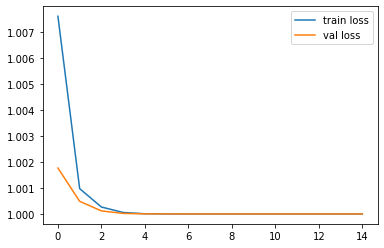

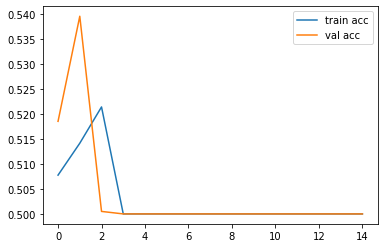

<Figure size 432x288 with 0 Axes>

In [72]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [73]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [74]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/dogs/dog.4015.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [ ]:
result

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('Datasets/test/cats/cat.4017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

print(result)


if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

Links

All Playlist In My channel
 Interview Playlist: https://www.youtube.com/playlist?list...​
Complete DL Playlist: https://www.youtube.com/watch?v=9jA0K...​
Julia Playlist: https://www.youtube.com/watch?v=Bxp1Y...​
Complete ML Playlist :https://www.youtube.com/playlist?list...​
Complete NLP Playlist:https://www.youtube.com/playlist?list...​
Docker End To End Implementation: https://www.youtube.com/playlist?list...​
Live stream Playlist: https://www.youtube.com/playlist?list...​
Machine Learning Pipelines: https://www.youtube.com/playlist?list...​
Pytorch Playlist: https://www.youtube.com/playlist?list...​
Feature Engineering  :https://www.youtube.com/playlist?list...​
Live Projects        :https://www.youtube.com/playlist?list...​
Kaggle competition   :https://www.youtube.com/playlist?list...​
Mongodb with Python  :https://www.youtube.com/playlist?list...​
MySQL With Python    :https://www.youtube.com/playlist?list...​
Deployment Architectures:https://www.youtube.com/playlist?list...​
Amazon sagemaker     :https://www.youtube.com/playlist?list...